# BANK CHURN PREDICTION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay,f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve,f1_score, auc



import warnings
warnings.filterwarnings('ignore')


# Loading Data Set

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bank Churn Prediction/Bank_Churn.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Null Values

In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


# Checking Data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Counting 1 and 0 Value in Exited column

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
# Removing customer_id ,Surname
df= df.drop(['CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
# converting object datatype to numerical datatype(int64)
df['Geography']=df['Geography'].replace(['France'],'0')
df['Geography']=df['Geography'].replace(['Germany'],'1')
df['Geography']=df['Geography'].replace(['Spain'],'2')



In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Age'].value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [ ]:
# changing object datatype to numerical datatype(int64)
df['Gender']=df['Gender'].replace(['Male'],'0')
df['Gender']=df['Gender'].replace(['Female'],'1')


In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


# Conver object data type column to int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Geography']=pd.to_numeric(df['Geography'])
df['Gender']=pd.to_numeric(df['Gender'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# EDA

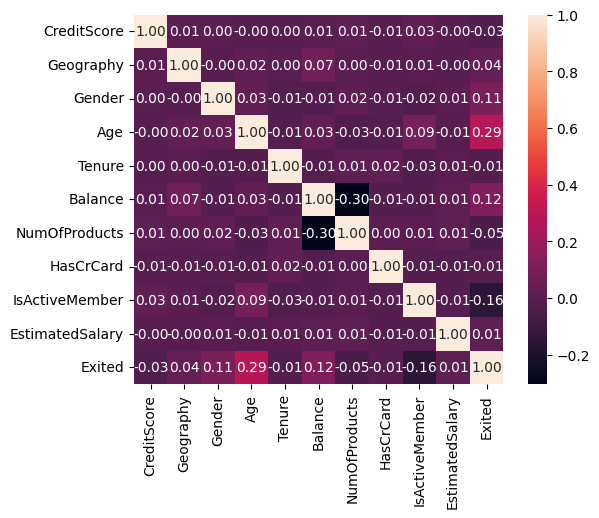

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10})
plt.show()


# Build Machine Learning Model

In [ ]:
X = df.drop(columns=['Exited'])
Y = df[['Exited']]

# Split Data into Train And Test data sets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(7500, 10)
(7500, 1)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(2500, 10)
(2500, 1)


In [ ]:
x_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,673,0,0,59,0,178058.06,2,0,1,21063.71
4375,850,1,0,41,8,60880.68,1,1,0,31825.84
6698,725,0,1,31,6,0.00,1,0,0,61326.43
9805,644,0,0,33,7,174571.36,1,0,1,43943.09
1101,703,2,0,29,9,0.00,2,1,0,50679.48


In [ ]:
y_train.head(5)

,Exited
4901,1
4375,0
6698,0
9805,0
1101,0


In [ ]:
x_train.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,False,False,False,False,False,False,False,False,False,False
4375,False,False,False,False,False,False,False,False,False,False
6698,False,False,False,False,False,False,False,False,False,False
9805,False,False,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5734,False,False,False,False,False,False,False,False,False,False
5191,False,False,False,False,False,False,False,False,False,False
5390,False,False,False,False,False,False,False,False,False,False
860,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_train.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


# Outlier Treatment

<Axes: >

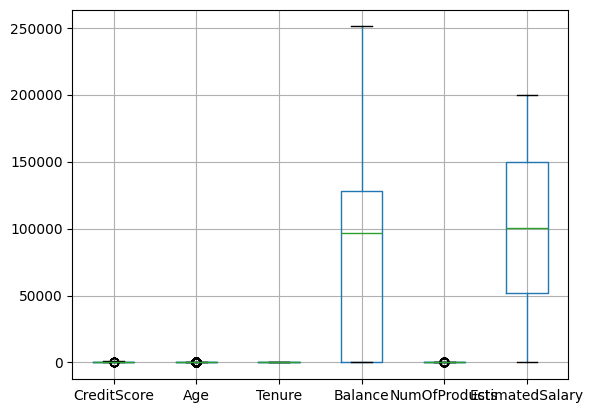

In [ ]:
x_train.boxplot(['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])

<Axes: >

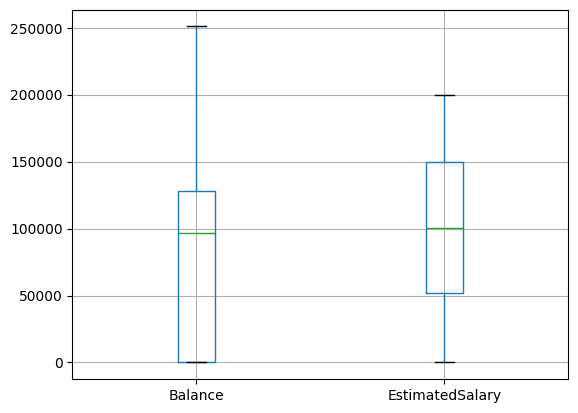

In [ ]:
x_train.boxplot(['Balance','EstimatedSalary'])

# this dataset doesn't has outliers

# Statistical Summary of your data

In [ ]:
x_train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,651.983333,0.750267,0.454000,38.878133,4.995067,76259.964333,1.528400,0.703333,0.515333,100668.132909
std,96.258085,0.829131,0.497913,10.499326,2.884698,62459.741773,0.580033,0.456819,0.499798,57569.556987
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,586.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51562.842500
50%,653.000000,1.000000,0.000000,37.000000,5.000000,96514.365000,1.000000,1.000000,1.000000,100626.105000
75%,719.000000,1.250000,1.000000,44.000000,7.000000,127685.682500,2.000000,1.000000,1.000000,149952.470000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000


# LogisticRegression


In [ ]:
lr=LogisticRegression(class_weight={0:1,1:2},max_iter=500,random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=500, random_state=42)

# prediction and confusion matrix

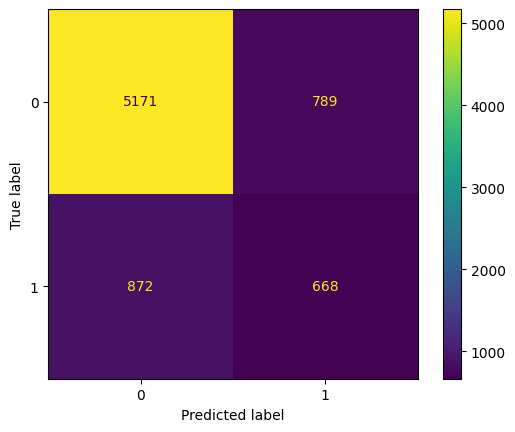

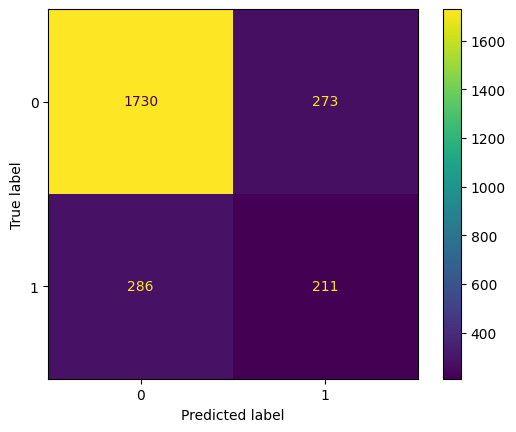

In [ ]:
tr_pred0=lr.predict(x_train)
val_pred0=lr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred0)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred0)


# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred0)
val_f1=f1_score(y_test,val_pred0)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))


Train f1 score -0.4457791124457791
val f1 score -0.43017329255861364


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred0))

Accuracy Score:  0.7764


# Classification report

In [ ]:
print('Classification report - ',classification_report(y_test,val_pred0))

Classification report -                precision    recall  f1-score   support

           0       0.86      0.86      0.86      2003
           1       0.44      0.42      0.43       497

    accuracy                           0.78      2500
   macro avg       0.65      0.64      0.65      2500
weighted avg       0.77      0.78      0.78      2500



# LogisticRegression

In [ ]:
lr1=LogisticRegression()
lr1.fit(x_train,y_train)

LogisticRegression()

# prediction and confusion matrix

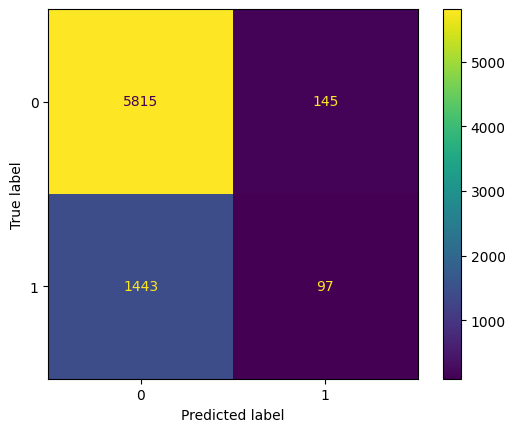

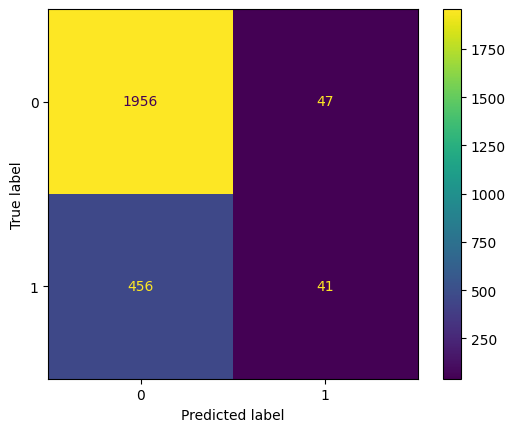

In [ ]:
tr_pred_lr=lr1.predict(x_train)
val_pred_lr=lr1.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred_lr)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred_lr)

# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred_lr)
val_f1=f1_score(y_test,val_pred_lr)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))

Train f1 score -0.10886644219977554
val f1 score -0.14017094017094017


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred_lr))

Accuracy Score:  0.7988


# Classification report

In [ ]:
print('Classification report - ',classification_report(y_test,val_pred_lr))

Classification report -                precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.47      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.64      0.53      0.51      2500
weighted avg       0.74      0.80      0.74      2500



# Decision Tree with cart(gini)

In [ ]:
Dt=DecisionTreeClassifier(random_state=1,max_depth=2)
Dt.fit(x_train,y_train)
train_score=Dt.score(x_train,y_train)
test_score=Dt.score(x_test,y_test)
print('Training Score: ',train_score)
print('Testing Score: ',test_score)


Training Score:  0.8390666666666666
Testing Score:  0.8464


# Decision Tree with entropy

In [ ]:
Dt1=DecisionTreeClassifier(random_state=1,max_depth=8,criterion='entropy')
Dt1.fit(x_train,y_train)
train_score=Dt.score(x_train,y_train)
test_score=Dt.score(x_test,y_test)
print('Training Score: ',train_score)
print('Testing Score: ',test_score)

Training Score:  0.8390666666666666
Testing Score:  0.8464


# model prediction

In [ ]:
tr_pred=Dt1.predict(x_train)
val_pred=Dt1.predict(x_test)

# confusion Matrix Display

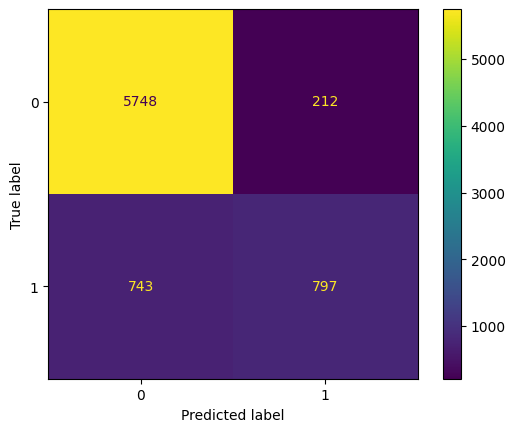

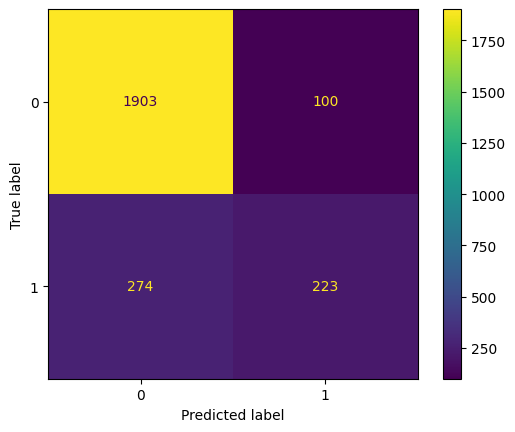

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)


# F1_score

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))


Train f1 score -0.6253432718713221
val f1 score -0.5439024390243903


# Accuracy score

In [ ]:

print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.8504


# Classification Report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2003
           1       0.69      0.45      0.54       497

    accuracy                           0.85      2500
   macro avg       0.78      0.70      0.73      2500
weighted avg       0.84      0.85      0.84      2500



# Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
tr1_pred=rf.predict(x_train)
val1_pred=rf.predict(x_test)

# ConfusionMatrixDisplay,f1_score

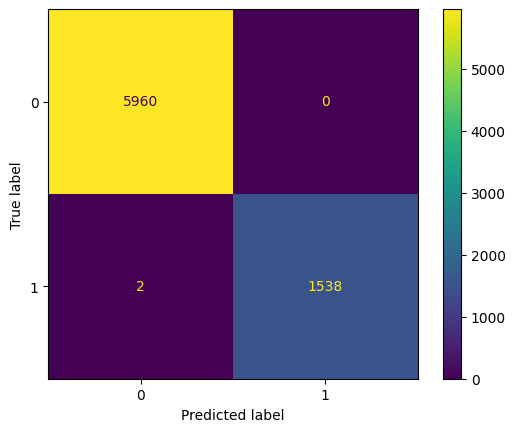

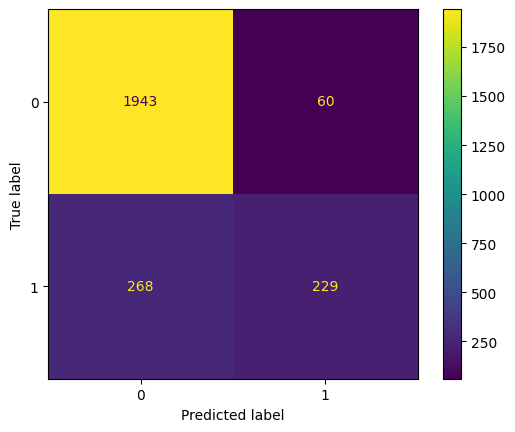

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,tr1_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val1_pred)

In [ ]:
train_f1 = f1_score(y_train,tr1_pred)
val_f1 = f1_score(y_test,val1_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9993502274204028
val F1 Score - 0.5826972010178118


# Accuracy Score

In [ ]:

print('Accuracy Score: ',accuracy_score(y_test,val1_pred))


Accuracy Score:  0.8688


# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val1_pred))

Classification report :               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [ ]:
fpr_rf,tpr_rf,_=roc_curve(y_test,val1_pred)
roc_auc_rf=auc(fpr_rf,tpr_rf)

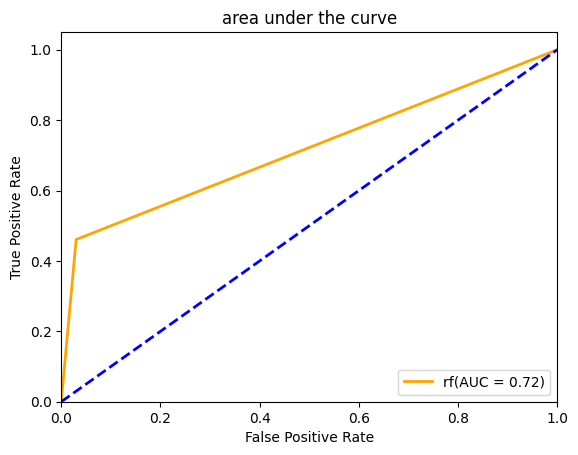

In [ ]:
plt.figure(15)
lw=2
plt.plot(fpr_rf,tpr_rf,color='orange',lw=lw,label='rf(AUC = %0.2f)'%roc_auc_rf)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('area under the curve')
plt.legend(loc='lower right')

# Extract feature importances

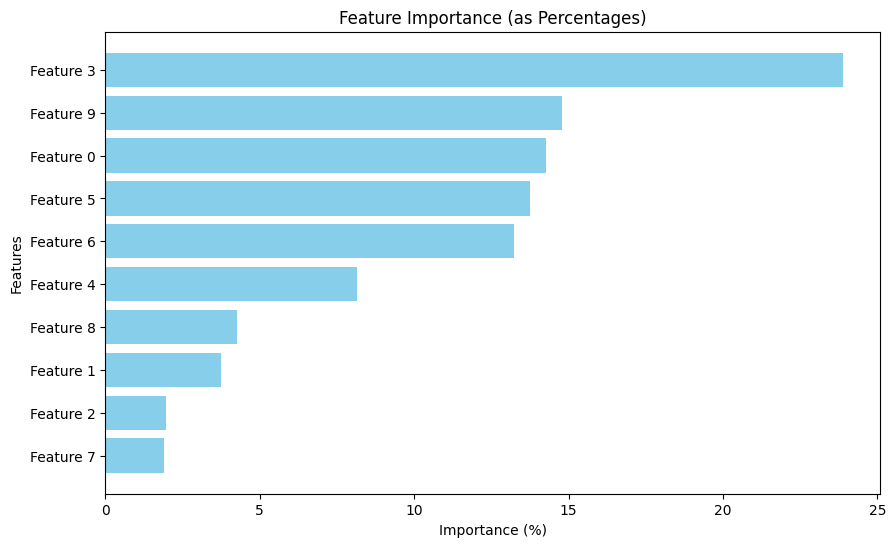

In [ ]:
# Extract feature importances
feature_importances = rf.feature_importances_

# Calculate percentages
importance_percentages = (feature_importances / np.sum(feature_importances)) * 100

# Feature names or indices
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Sort features by importance
sorted_indices = np.argsort(importance_percentages)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = importance_percentages[sorted_indices]

# Plot feature importances with percentages and feature names
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance (as Percentages)')
plt.gca().invert_yaxis()  # Invert y-axis for a top-down plot
plt.show()


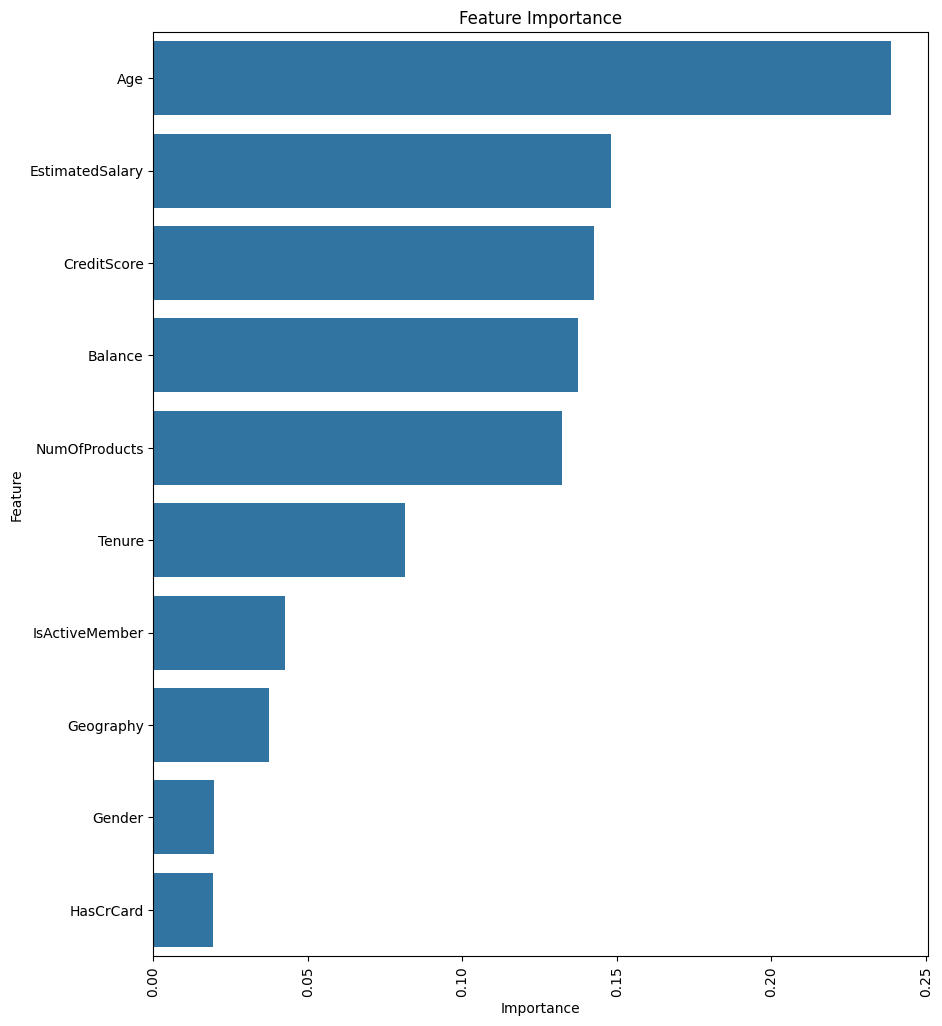

In [ ]:
# For rf is a trained RandomForest model
importances = rf.feature_importances_
feature_names = rf.feature_names_in_

# Create a DataFrame and sort by importance
sorted_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y='Feature', data=sorted_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

# Support Vector Machine

In [ ]:
svm=SVC(class_weight={0:1,1:2},C=0.99,degree=6,random_state=42)
svm.fit(x_train,y_train)

SVC(C=0.99, class_weight={0: 1, 1: 2}, degree=6, random_state=42)

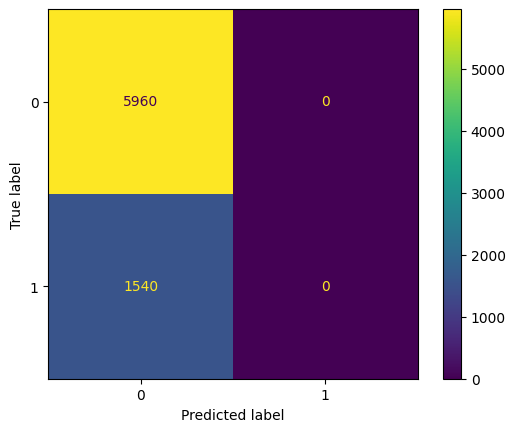

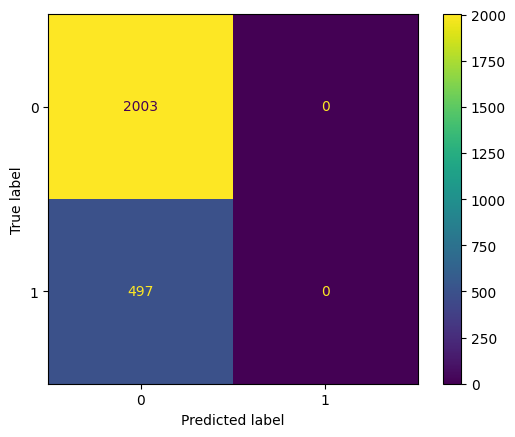

In [ ]:
tr_pred1 = svm.predict(x_train)
val_pred1 = svm.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred1)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred1)

In [ ]:
train_f1 = f1_score(y_train,tr_pred1)
val_f1 = f1_score(y_test,val_pred1)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.0
val F1 Score - 0.0


In [ ]:
# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test,val_pred1))

Accuracy Score:  0.8012


In [ ]:
print('Classification report :',classification_report(y_test,val_pred1))

Classification report :               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.00      0.00      0.00       497

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



# XGBOOST

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# model prediction

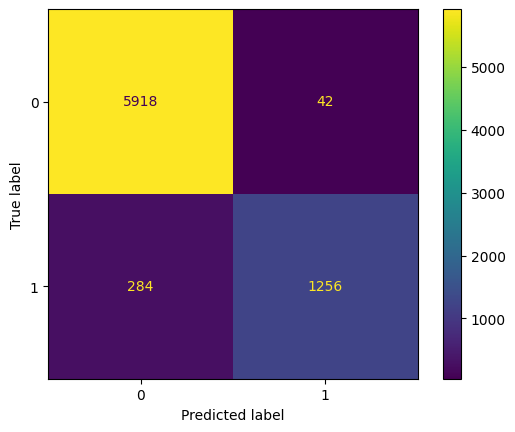

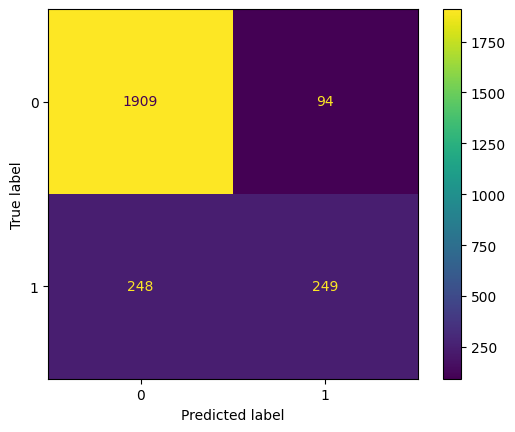

In [ ]:
tr_pred2 = xgb.predict(x_train)
val_pred2 = xgb.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred2)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred2)

In [ ]:
train_f1 = f1_score(y_train,tr_pred2)
val_f1 = f1_score(y_test,val_pred2)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8851303735024665
val F1 Score - 0.5928571428571429


# Accuracy score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred2))

Accuracy Score:  0.8632


# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred2))

Classification report :               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2003
           1       0.73      0.50      0.59       497

    accuracy                           0.86      2500
   macro avg       0.81      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



# Area under the curve

In [ ]:
fpr_xgb,tpr_xgb,_=roc_curve(y_test,val_pred2)
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)

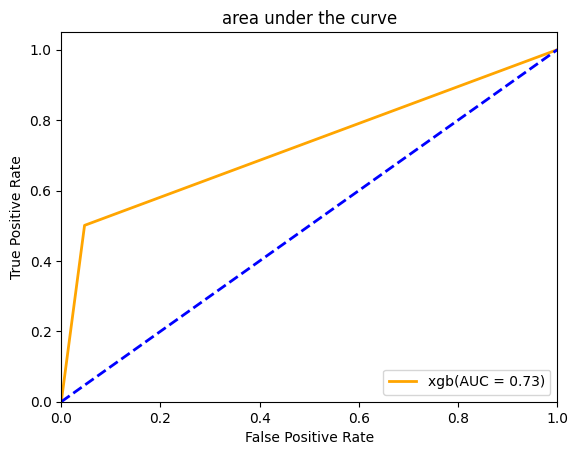

In [ ]:
plt.figure(1)
lw=2
plt.plot(fpr_xgb,tpr_xgb,color='orange',lw=lw,label='xgb(AUC = %0.2f)'%roc_auc_xgb)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('area under the curve')
plt.legend(loc='lower right')

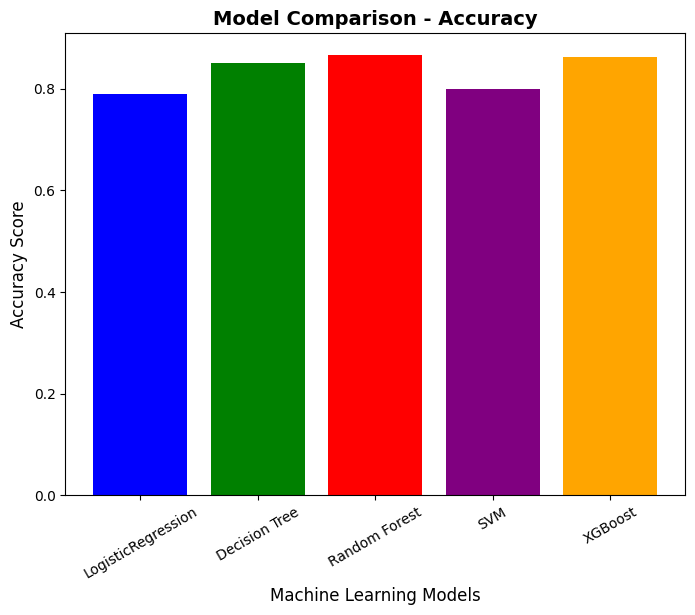

In [ ]:
#  model names and their accuracy scores
models = ['LogisticRegression', 'Decision Tree','Random Forest', 'SVM', 'XGBoost']
accuracy = [0.79, 0.85, 0.866, 0.80, 0.863]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange'])

# Labels and title
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Model Comparison - Accuracy', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)
plt.show()


# Conclusion
Customer churn is a major challenge for banks, as it affects both revenue and the long-term value of customers. This project aimed to build a machine learning model that can predict whether a customer is likely to leave the bank (churn), using information such as demographics, financial data, and account activity.

Our predictive model classifies customers as either likely to stay (Exited = 0) or leave (Exited = 1). The most important factors influencing churn were identified as **Age**, **Estimated Salary**, **Credit Score**, and **Account Balance**.

Among the models tested, **Random Forest** and **XGBoost** performed the best, each achieving an accuracy of **86%**.

Since the dataset was imbalanced (more non-churners than churners), we applied **resampling techniques** to the training data to improve the model's ability to detect customers likely to churn. However, further improvement can be achieved by experimenting with more advanced sampling methods.

To prepare the data for modeling, we converted categorical variables like **Geography** and **Gender** into numerical format (int64), which is required by machine learning algorithms.

We evaluated each model using a range of performance metrics, including:

* F1 Score
* Recall
* AUC (Area Under the Curve)
* Confusion Matrix
* Accuracy Score
* Classification Report

Additionally, hyperparameter tuning was applied to optimize each model for better predictions.
